<a href="https://colab.research.google.com/github/sabeesh90/EVA6_master/blob/main/resnet_mod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Navigation inside root directory

In [1]:
# !pip install albumentations==0.4.6
# !pip install torch-lr-finder
# install these libraries before executing this notebook

In [2]:
import torchvision

from IPython.display import clear_output
import shutil
import  os
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
import cv2
os.chdir('/content/')
try:
    shutil.rmtree('EVA6_master')
except Exception as E:
    print('The Tree is not Present')
import warnings
warnings.filterwarnings('ignore')
import pickle
os.chdir('/content/')

##### Cloning the repository

In [3]:
!git clone https://github.com/sabeesh90/EVA6_master.git

Cloning into 'EVA6_master'...
remote: Enumerating objects: 379, done.
remote: Counting objects: 100% (379/379), done.
remote: Compressing objects: 100% (373/373), done.
remote: Total 379 (delta 184), reused 2 (delta 0), pack-reused 0
Receiving objects: 100% (379/379), 1.00 MiB | 7.03 MiB/s, done.
Resolving deltas: 100% (184/184), done.


##### navgiating to models folder and loading requisite libraries

In [4]:

%cd EVA6_master/"main and utils"
import main2
from main2 import *
import custom_resnet
from custom_resnet import *

/content/EVA6_master/main and utils


In [5]:
model_generated1 = ResNet18new()

##### Summary of the architecture

In [6]:
generate_model(model_generated1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
        RandomCrop-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
       BasicBlock-14          [-1, 128,

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (layer1_preprocessing): Sequential(
        (0): RandomCrop(size=(32, 32), padding=4)
      )
      (layer1): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
        (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): ReLU()
      )
      (resblock): Sequential(
        (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(128, eps=1e

##### Visualizing the network architecture

In [7]:
nn.Sequential(*list(model_generated1.children()))

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Sequential(
    (0): BasicBlock(
      (layer1_preprocessing): Sequential(
        (0): RandomCrop(size=(32, 32), padding=4)
      )
      (layer1): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
        (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): ReLU()
      )
      (resblock): Sequential(
        (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(128, eps=1e-05, mo

##### Generating train and test dataset

In [8]:
trainloader, testloader = generate_dataset(512,512)

Files already downloaded and verified
Files already downloaded and verified


##### Finding the optimal LR using the find LR library

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.50E-02


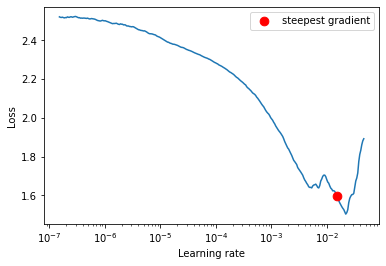

In [10]:
import train_test_normal
from train_test_normal import *
from torch_lr_finder import LRFinder

model = model_generated1
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7,nesterov=True, weight_decay=1e-3,momentum = 0.92)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=500)
lr_finder.plot() 
lr_finder.reset() 

##### Setting the optimizer and the scheduler

In [11]:
optimizer = optim.SGD(model.parameters(), lr=1.50e-2, weight_decay=1e-2,momentum = 0.92,nesterov=True)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr =0.1,final_div_factor=0.00001, steps_per_epoch=len(trainloader), epochs=24, anneal_strategy='cos')

##### Training the model

In [19]:

epochs = 24
device = 'cuda'
for epoch in range(epochs):
    print("EPOCH:", epoch)
    train(model_generated1,device, trainloader, optimizer,epoch)
    scheduler.step()
    test(model_generated1, device, testloader)


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.1669824123382568 Batch_id=97 Accuracy=42.87: 100%|██████████| 98/98 [00:15<00:00,  6.30it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -2.9751, Accuracy: 5376/10000 (53.76%)

EPOCH: 1


Loss=0.8041726350784302 Batch_id=97 Accuracy=64.54: 100%|██████████| 98/98 [00:15<00:00,  6.32it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -4.8412, Accuracy: 6918/10000 (69.18%)

EPOCH: 2


Loss=0.6366168856620789 Batch_id=97 Accuracy=73.93: 100%|██████████| 98/98 [00:15<00:00,  6.30it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -5.2297, Accuracy: 7506/10000 (75.06%)

EPOCH: 3


Loss=0.6756410598754883 Batch_id=97 Accuracy=78.86: 100%|██████████| 98/98 [00:15<00:00,  6.31it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -5.6892, Accuracy: 7793/10000 (77.93%)

EPOCH: 4


Loss=0.48985135555267334 Batch_id=97 Accuracy=82.26: 100%|██████████| 98/98 [00:15<00:00,  6.31it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -6.2213, Accuracy: 8033/10000 (80.33%)

EPOCH: 5


Loss=0.3546385169029236 Batch_id=97 Accuracy=84.27: 100%|██████████| 98/98 [00:15<00:00,  6.33it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -6.4402, Accuracy: 8224/10000 (82.24%)

EPOCH: 6


Loss=0.4077630639076233 Batch_id=97 Accuracy=86.17: 100%|██████████| 98/98 [00:15<00:00,  6.31it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -7.2416, Accuracy: 8273/10000 (82.73%)

EPOCH: 7


Loss=0.3837313950061798 Batch_id=97 Accuracy=87.26: 100%|██████████| 98/98 [00:15<00:00,  6.32it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -6.6208, Accuracy: 8290/10000 (82.90%)

EPOCH: 8


Loss=0.32322990894317627 Batch_id=97 Accuracy=88.19: 100%|██████████| 98/98 [00:15<00:00,  6.32it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -7.3589, Accuracy: 8430/10000 (84.30%)

EPOCH: 9


Loss=0.43049120903015137 Batch_id=97 Accuracy=89.30: 100%|██████████| 98/98 [00:15<00:00,  6.31it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -7.0546, Accuracy: 8277/10000 (82.77%)

EPOCH: 10


Loss=0.2655034065246582 Batch_id=97 Accuracy=90.13: 100%|██████████| 98/98 [00:15<00:00,  6.32it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -7.3167, Accuracy: 8652/10000 (86.52%)

EPOCH: 11


Loss=0.3228275775909424 Batch_id=97 Accuracy=90.67: 100%|██████████| 98/98 [00:15<00:00,  6.32it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -6.9310, Accuracy: 8010/10000 (80.10%)

EPOCH: 12


Loss=0.27272483706474304 Batch_id=97 Accuracy=91.46: 100%|██████████| 98/98 [00:15<00:00,  6.31it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -7.1259, Accuracy: 8592/10000 (85.92%)

EPOCH: 13


Loss=0.2920067310333252 Batch_id=97 Accuracy=91.67: 100%|██████████| 98/98 [00:15<00:00,  6.31it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -7.3009, Accuracy: 8555/10000 (85.55%)

EPOCH: 14


Loss=0.23666898906230927 Batch_id=97 Accuracy=92.05: 100%|██████████| 98/98 [00:15<00:00,  6.30it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -7.1871, Accuracy: 8574/10000 (85.74%)

EPOCH: 15


Loss=0.24885806441307068 Batch_id=97 Accuracy=92.37: 100%|██████████| 98/98 [00:15<00:00,  6.32it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -7.5749, Accuracy: 8674/10000 (86.74%)

EPOCH: 16


Loss=0.22581398487091064 Batch_id=97 Accuracy=92.82: 100%|██████████| 98/98 [00:15<00:00,  6.30it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -7.0288, Accuracy: 8754/10000 (87.54%)

EPOCH: 17


Loss=0.21403633058071136 Batch_id=97 Accuracy=93.12: 100%|██████████| 98/98 [00:15<00:00,  6.32it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -7.4974, Accuracy: 8780/10000 (87.80%)

EPOCH: 18


Loss=0.26757505536079407 Batch_id=97 Accuracy=93.42: 100%|██████████| 98/98 [00:15<00:00,  6.30it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -6.7901, Accuracy: 8664/10000 (86.64%)

EPOCH: 19


Loss=0.22201335430145264 Batch_id=97 Accuracy=93.46: 100%|██████████| 98/98 [00:15<00:00,  6.30it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -6.7807, Accuracy: 8805/10000 (88.05%)

EPOCH: 20


Loss=0.2480808049440384 Batch_id=97 Accuracy=93.80: 100%|██████████| 98/98 [00:15<00:00,  6.32it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -6.9068, Accuracy: 8649/10000 (86.49%)

EPOCH: 21


Loss=0.16319507360458374 Batch_id=97 Accuracy=93.91: 100%|██████████| 98/98 [00:15<00:00,  6.34it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -7.4574, Accuracy: 8810/10000 (88.10%)

EPOCH: 22


Loss=0.22796912491321564 Batch_id=97 Accuracy=94.19: 100%|██████████| 98/98 [00:15<00:00,  6.33it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -6.9490, Accuracy: 8848/10000 (88.48%)

EPOCH: 23


Loss=0.18983836472034454 Batch_id=97 Accuracy=94.55: 100%|██████████| 98/98 [00:15<00:00,  6.30it/s]



Test set: Average loss: -6.6932, Accuracy: 8721/10000 (87.21%)

